In [142]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import networkx as nx
from CitNet import Utils
from CitNet import GraphCN
from CitNet import Query
from CitNet import HubsAuths as HA

In [37]:
path_data = os.path.join(os.getcwd(),'Tables')

In [88]:
df = pd.read_csv(path_data + '/df_CitNet.csv', 
                 encoding="ISO-8859-1", 
                 index_col=0)
cits_edgesdf = pd.read_csv(path_data + "/cits_edges.csv")
refs_edgesdf = pd.read_csv(path_data + "/refs_edges.csv")
cits_edges = GraphCN.edgesdf_to_edgeslist(cits_edgesdf)
refs_edges = GraphCN.edgesdf_to_edgeslist(refs_edgesdf)
all_edges = cits_edges + refs_edges
cits_refs_graph = nx.DiGraph(all_edges)

# Query 101

In [139]:
print("Hello Science!")
raw_query = input()
query = []
for q in raw_query.split(" "):
    query += [str(q)]

Hello Science!
oil


## PageRank

In [83]:
df.loc[Query.topic_query(df, query)[0]].sort_values(by='pr_rank', ascending=False)[['title', 'authors', 'date']].iloc[:10]

,title,authors,date
39299,The value of fiscal discipline for oil-exporti...,"PieschacÃÂ³n, AnamarÃÂ­a",2012-02-02
81760,How to subsidize contributions to public goods...,"Offerman, Theo; van der Veen, Ailko",2015-02-02
81684,Fueling growth when oil peaks: Directed techno...,"AndrÃÂ©, Francisco J.; Smulders, Sjak",2014-02-02
81262,The impact of bargaining on markets with price...,"Gill, David; Thanassoulis, John",2009-02-02
46393,"Monetary, fiscal and oil shocks: Evidence base...","Marcellino, Massimiliano; Sivec, Vasja",2016-02-02
62952,The impact of oil prices on an oil-importing d...,"Schubert, Stefan F.; Turnovsky, Stephen J.",2011-02-02
63565,No toilet no bride? Intrahousehold bargaining ...,"Stopnitzky, Yaniv",2017-02-02
72846,Modeling systemic risk and dependence structur...,"Mensi, Walid; Hammoudeh, Shawkat; Shahzad, Sye...",2017-02-02
62625,"""A note on soil depth, failing markets and agr...","Lichtenberg, Erik",2006-02-02
62225,"Poverty, consumption risk, and soil conservation","Shively, Gerald E.",2001-02-02


## PargeRank with time discount

In [84]:
df.loc[Query.topic_query(df, query)[0]].sort_values(
    by='prt_rank', ascending=False)[['title', 'authors', 'date']].iloc[:10]

,title,authors,date
61328,"Exports, policy changes, and economic growth i...","Rana, Pradumna B.",1988-02-02
61504,Terms of trade shocks and structural adjustmen...,"Fardmanesh, Mohsen",1990-02-02
62001,Empirical investigation of one OPEC country's ...,"Rodgers, Yana van der Meulen",1998-02-02
56517,The economics of accidental oil pollution by t...,"Burrows, Paul; Rowley, Charles; Owen, David",1974-02-02
8744,Production Technologies of the U.S. Boiler and...,"Ohta, Makoto",1975-02-02
62225,"Poverty, consumption risk, and soil conservation","Shively, Gerald E.",2001-02-02
78437,OPEC and the monopoly price of world oil,"Cremer, Jacques; Weitzman, Martin L.",1976-02-02
61980,Soil conservation as an investment in land,"Grepperud, S.",1997-02-02
39961,Japan's macroeconomic performance since the fi...,"Komiya, Ryutaro; Yasui, Kazuo",1984-02-02
62059,"A note on soil depth, failing markets and agri...","Bulte, Erwin; van Soest, Daan",1999-02-02


## HITS

In [85]:
df.loc[Query.topic_query(df, query)[0]].sort_values(
    by='auth_rank', ascending=False)[['title', 'authors', 'date']].iloc[:10]

,title,authors,date
60144,Remittances and public finances: Evidence from...,"Asatryan, Zareh; Bittschi, Benjamin; Doerrenbe...",2017-02-02
62952,The impact of oil prices on an oil-importing d...,"Schubert, Stefan F.; Turnovsky, Stephen J.",2011-02-02
62625,"""A note on soil depth, failing markets and agr...","Lichtenberg, Erik",2006-02-02
62001,Empirical investigation of one OPEC country's ...,"Rodgers, Yana van der Meulen",1998-02-02
62225,"Poverty, consumption risk, and soil conservation","Shively, Gerald E.",2001-02-02
72905,Do oil futures prices predict stock returns?,"Chiang, I-Hsuan Ethan; Hughen, W. Keener",2017-02-02
72846,Modeling systemic risk and dependence structur...,"Mensi, Walid; Hammoudeh, Shawkat; Shahzad, Sye...",2017-02-02
63565,No toilet no bride? Intrahousehold bargaining ...,"Stopnitzky, Yaniv",2017-02-02
26509,The performance of corporate alliances: Eviden...,"Beshears, John",2013-02-02
46393,"Monetary, fiscal and oil shocks: Evidence base...","Marcellino, Massimiliano; Sivec, Vasja",2016-02-02


# Advanced queries

In [140]:
print("Hello Science!")
raw_query = input()
query = []
for q in raw_query.split(" "):
    query += [str(q)]

Hello Science!
oil


## Topics

In [131]:
d = 300
subtest_topic = Query.topic_query_subgraph(cits_refs_graph, d, df, query)
hubs_auths_df = HA.iterate_hubs_auths(subtest_topic, k=1000)
# hubs_auths_eig = HA.hubs_authorities_eigen(subtest_topic, neigs=1)
top_auths_topic = hubs_auths_df.sort_values(
    by="xauth_0", ascending=False).index
top_hubs_topic = hubs_auths_df.sort_values(by="xhubs_0", ascending=False).index
df.loc[top_auths_topic][['title', 'authors', 'date']].iloc[:10]

,title,authors,date
9394,Oil and the Macroeconomy since World War II,"Hamilton, James D",1983-02-02
44583,What is an oil shock?,"Hamilton, James D.",2003-02-02
38141,This is what happened to the oil price-macroec...,"Hamilton, James D.",1996-02-02
67898,Systematic Monetary Policy and the Effects of ...,Ben S. Bernanke; Mark Gertler; Mark Watson,1997-02-02
9805,Oil and Macroeconomy When Prices Go Up and Dow...,"Mork, Knut Anton",1989-02-02
18584,Not All Oil Price Shocks Are Alike: Disentangl...,Lutz Kilian,2009-02-02
37922,The role of energy in real business cycle models,"Kim, In-Moo; Loungani, Prakash",1992-02-02
41751,Oil and the Macroeconomy Since the 1970s,Robert B. Barsky; Lutz Kilian,2004-02-02
51561,Exogenous Oil Supply Shocks: How Big Are They ...,Lutz Kilian,2008-02-02
9736,A Neoclassical Model of Unemployment and the B...,"Hamilton, James D",1988-02-02


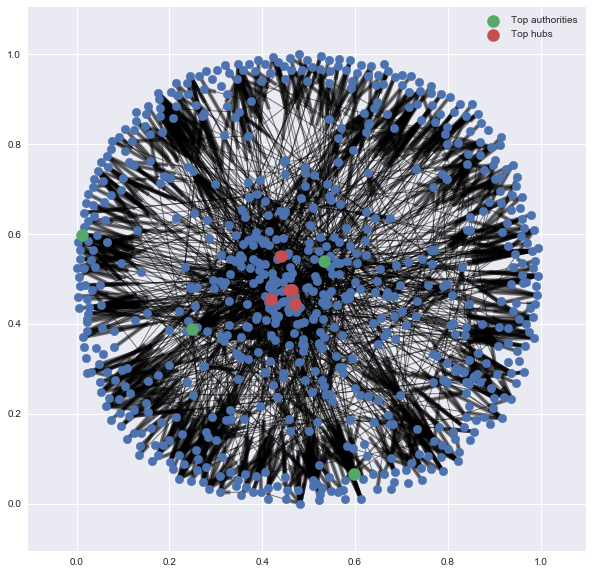

In [133]:
plt.figure(figsize=(10,10))
HA.plot_hubs_authorities(subtest_topic, top_auths_topic, top_hubs_topic)

## Articles

A bit of inspiration 

|Index| Title| Authors| Date|
|:----|:----|:----|:----|
|23028| A Model of Growth through Creative Destruction|	Aghion, Philippe; Howitt, Peter| 1992|
|23721| The Impact of Trade on Intra-Industry Realloca...|	Marc J. Melitz|	2003|
|37477| Staggered prices in a utility-maximizing frame...|	Calvo, Guillermo A.|1983|
|77112| Limited asset markets participation, monetary ...|	Bilbiie, Florin O.|	2008|
|27752| Top Incomes in the Long Run of History|	Anthony B. Atkinson; Thomas Piketty; Emmanuel Saez|	2011|

In [144]:
print("Hello Science!")
raw_index = input()
index = []
for ind in raw_index.split(","):
    index += [int(ind)]

Hello Science!
23028


### HITS

In [130]:
d = 300
#pages = [23721]  # Melitz
subtest_similarity = Query.similarity_query_subgraph(index, cits_refs_graph, d)
hubs_auths_sim = HA.hubs_authorities_eigen(subtest_similarity, neigs=1)
top_auths_sim = hubs_auths_sim.sort_values(by="xauth_0", ascending=False).index
top_hubs_sim = hubs_auths_sim.sort_values(by="xhub_0", ascending=False).index
df.loc[top_auths_sim][['title', 'authors', 'date']].iloc[:10]

,title,authors,date
37724,On the mechanics of economic development,"Lucas, Robert Jr.",1988-02-02
9621,Increasing Returns and Long-run Growth,"Romer, Paul M",1986-02-02
4166,A Contribution to the Empirics of Economic Growth,N. Gregory Mankiw; David Romer; David N. Weil,1992-02-02
23028,A Model of Growth through Creative Destruction,"Aghion, Philippe; Howitt, Peter",1992-02-02
4467,Why do Some Countries Produce So Much More Out...,Robert E. Hall; Charles I. Jones,1999-02-02
4112,Economic Growth in a Cross Section of Countries,Robert J. Barro,1991-02-02
12567,Monopolistic Competition and Optimum Product D...,"Dixit, Avinash K; Stiglitz, Joseph E",1977-02-02
9934,Long-Run Policy Analysis and Long-Run Growth,"Rebelo, Sergio",1991-02-02
9897,Endogenous Technological Change,"Romer, Paul M",1990-02-02
17059,The Colonial Origins of Comparative Developmen...,Daron Acemoglu; Simon Johnson; James A. Robinson,2001-02-02


### Personalized PageRank

In [146]:
arg = np.where(np.array(cits_refs_graph.nodes())==index)[0][0]
init_pers = np.zeros(len(cits_refs_graph.nodes()))
np.put(init_pers, [arg], [1])
init_pers = dict(zip(cits_refs_graph.nodes(), init_pers))
pers_score = nx.pagerank_scipy(cits_refs_graph, alpha=1, personalization=init_pers)
def dict_rank(dic):
    return {key: rank for rank, key in enumerate(sorted(dic, key=dic.get, reverse=True))}
pers_rank = dict_rank(pers_score)
df.loc[list(pers_rank.keys())][['title', 'authors', 'date']].iloc[:10]

,title,authors,date
23028,A Model of Growth through Creative Destruction,"Aghion, Philippe; Howitt, Peter",1992-02-02
22543,On the Performance of Patents,"Judd, Kenneth L",1985-02-02
28523,The Economic Implications of Learning by Doing,Kenneth J. Arrow,1962-02-02
12567,Monopolistic Competition and Optimum Product D...,"Dixit, Avinash K; Stiglitz, Joseph E",1977-02-02
37724,On the mechanics of economic development,"Lucas, Robert Jr.",1988-02-02
9621,Increasing Returns and Long-run Growth,"Romer, Paul M",1986-02-02
74759,Self-fulfilling prophecies,"Azariadis, Costas",1981-02-02
9628,Implementation Cycles,"Shleifer, Andrei",1986-02-02
37414,Trends and random walks in macroeconmic time s...,"Nelson, Charles R.; Plosser, Charles I.",1982-02-02
15104,A Schumpeterian Model of the Product Life Cycle,"Segerstrom, Paul S; Anant, T C A; Dinopoulos, ...",1990-02-02
